# 1.Import library and dataset

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

#dataset
df = pd.read_csv('Analyst_task251021.csv', sep =';')
df.head(10)

,trn_month,trn_day,regionname,unitid,newclient,platformid,clientfirstpurchaseproduct,ordertype,productid,categoryid,sizenumber,response
0,10,22,Московская область,200,0,2.0,0,доставка,15016,напитки,0.4,6
1,5,11,Уральский ФО,627,0,0.0,0,самовывоз,15016,напитки,0.4,7
2,10,10,Дальневосточный ФО,111,0,1.0,1,доставка,15025,закуски,260.0,7
3,3,18,Приволжский ФО,1156,1,NaN,0,доставка,15023,десерты,16.0,7
4,3,5,Санкт-Петербург,448,0,NaN,1,доставка,3100,пицца,30.0,6
5,3,20,Центральный ФО,371,1,NaN,0,доставка,15023,десерты,16.0,7
6,8,28,Северо-Кавказский ФО,555,0,2.0,0,доставка,3099,пицца,30.0,6
7,3,18,Северо-Кавказский ФО,1054,0,NaN,1,самовывоз,15016,напитки,0.4,7
8,7,18,Приволжский ФО,823,0,1.0,1,доставка,3099,пицца,30.0,7
9,10,14,Южный ФО,121,0,1.0,0,доставка,3099,пицца,30.0,6


# 2.Clear Dataset

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533685 entries, 0 to 533684
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   trn_month                   533685 non-null  int64  
 1   trn_day                     533685 non-null  int64  
 2   regionname                  533685 non-null  object 
 3   unitid                      533685 non-null  int64  
 4   newclient                   533685 non-null  int64  
 5   platformid                  384089 non-null  float64
 6   clientfirstpurchaseproduct  533685 non-null  int64  
 7   ordertype                   533685 non-null  object 
 8   productid                   533685 non-null  int64  
 9   categoryid                  533685 non-null  object 
 10  sizenumber                  533685 non-null  float64
 11  response                    533685 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 48.9+ MB


In [40]:
# check null values
df.isnull().sum()

trn_month                          0
trn_day                            0
regionname                         0
unitid                             0
newclient                          0
platformid                    149596
clientfirstpurchaseproduct         0
ordertype                          0
productid                          0
categoryid                         0
sizenumber                         0
response                           0
dtype: int64

In [31]:
# check duplicates values in data
df.duplicated().sum()

1242

In [84]:
# drop duplicates 
df = df.drop_duplicates()
df.duplicated().sum()

0

In [33]:
#describe dataset
df.describe()

,trn_month,trn_day,unitid,newclient,platformid,clientfirstpurchaseproduct,productid,sizenumber,response
count,382847.00000,382847.000000,382847.000000,382847.000000,382847.000000,382847.000000,382847.000000,382847.000000,382847.000000
mean,7.19303,15.694512,590.475859,0.118786,1.273391,0.398146,7697.787307,73.793994,6.244176
std,1.83388,8.572415,361.676294,0.323537,0.576664,0.489516,6997.410073,89.084493,1.284733
min,3.00000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.060000,1.000000
25%,6.00000,9.000000,272.000000,0.000000,1.000000,0.000000,147.000000,25.000000,6.000000
50%,7.00000,16.000000,550.000000,0.000000,1.000000,0.000000,7030.000000,30.000000,7.000000
75%,9.00000,23.000000,920.000000,0.000000,2.000000,1.000000,15308.000000,100.000000,7.000000
max,10.00000,31.000000,1291.000000,1.000000,2.000000,1.000000,18364.000000,560.000000,7.000000


In [34]:
# show all region name
for x in df['regionname'].unique():
    print (x)

Московская область
Уральский ФО
Дальневосточный ФО
Северо-Кавказский ФО
Приволжский ФО
Южный ФО
Северо-Западный ФО
Москва
Центральный ФО
Ленинградская область
Сибирский ФО
Санкт-Петербург
Не определен


In [85]:
# delete 'Indefined' elements in regionname
df.drop(df.loc[df['regionname']=='Не определен'].index, inplace=True)


In [36]:
for x in df['regionname'].unique():
    print (x)

Московская область
Уральский ФО
Дальневосточный ФО
Северо-Кавказский ФО
Приволжский ФО
Южный ФО
Северо-Западный ФО
Москва
Центральный ФО
Ленинградская область
Сибирский ФО
Санкт-Петербург


# 3.Data visualization
## Часть 1
- Что происходит с оценкой показателя со временем
- Оценить изменения с т.з. статистической значимости, построить д.и.
- Есть ли какие-то региональные особенности


Text(0.5, 1.0, 'Изменение оценок клиентов со времением')

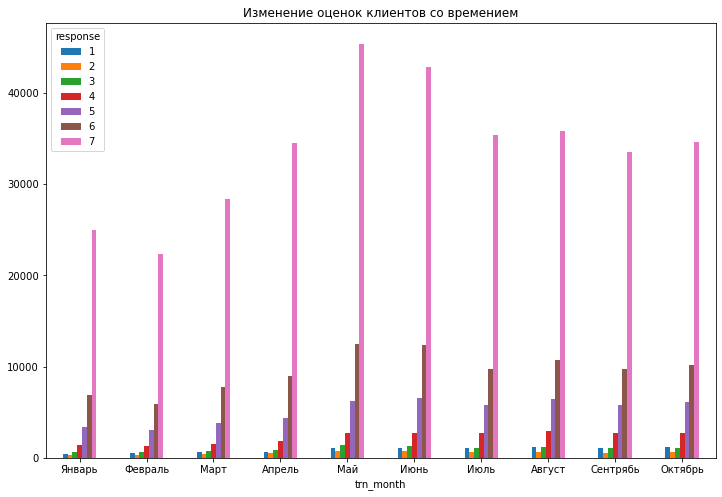

In [43]:
df.groupby(['trn_month','response']).count()['unitid'].unstack().plot(figsize= (12,8), kind='bar')
month = ['Январь',"Февраль","Март","Апрель","Май","Июнь","Июль","Август","Сентрябь","Октябрь"]


plt.xticks((0,1,2,3,4,5,6,7,8,9), month, rotation=0)
plt.title('Изменение оценок клиентов со времением')

Text(0.5, 1.0, 'Изменение оценок клиентов со времением')

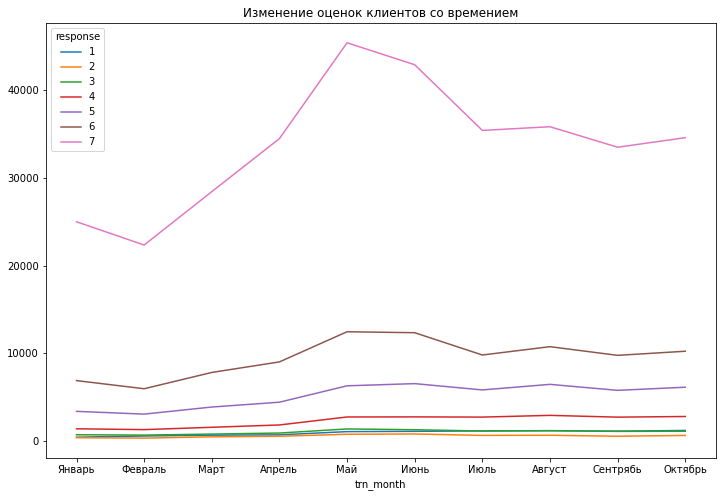

In [44]:
df.groupby(['trn_month','response']).count()['unitid'].unstack().plot(figsize= (12,8))
plt.xticks((1,2,3,4,5,6,7,8,9,10),month)
plt.title('Изменение оценок клиентов со времением')

Text(0.5, 0, 'Месяцы')

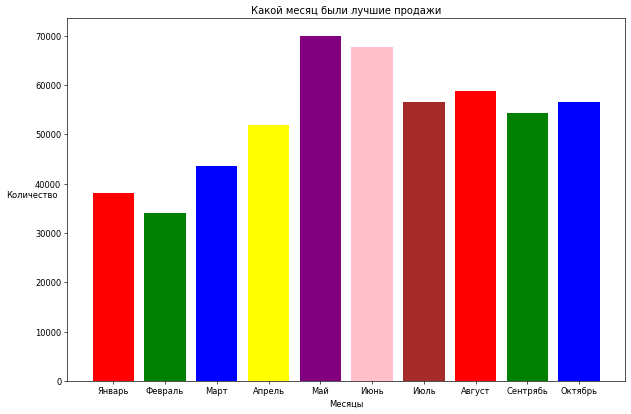

In [56]:
count_month = df.groupby('trn_month').count()
month_h = ['Январь',"Февраль","Март","Апрель","Май","Июнь","Июль","Август","Сентрябь","Октябрь"]

plt.figure(figsize=(12,8), dpi= 60)
plt.bar(month_h, count_month['unitid'], color = ['red','green','blue','yellow','purple','pink','brown'])
plt.title('Какой месяц были лучшие продажи')
plt.ylabel('Количество',rotation = 0)
plt.xlabel('Месяцы',rotation = 0)

<AxesSubplot:ylabel='unitid'>

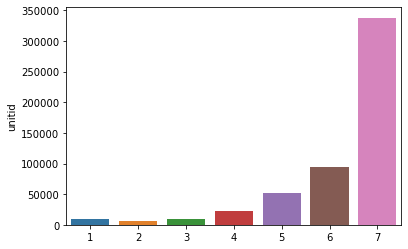

In [66]:
#distribution of ratings

res_data = df.groupby('response').count()
resp = [1,2,3,4,5,6,7]

sns.barplot(x = resp, y = res_data['unitid'])

## Оценить изменения с т.з. статистической значимости, построить д.и.

In [77]:
# set the required statistical significance
confidence = 0.95


In [146]:
# function for constructing the confidence interval
def mean_confidence_interval(df, confidence):
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    #доверительный интервал 
    ci = confidence * np.std(y)/np.mean(y)

    fig, ax = plt.subplots()
    plt.figure(figsize=(12,8))
    ax.plot(x,y)
    ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

    return ci

In [78]:
# let's group the data by month and calculate the average score for each
result_months = df.groupby(['trn_month']).response.agg(['mean', 'count']).reset_index()
result_months.sort_values(by='trn_month', ascending=True)

,trn_month,mean,count
0,1,6.348030,38080
1,2,6.314283,34138
2,3,6.322787,43521
3,4,6.351555,51807
4,5,6.304440,70017
5,6,6.273889,67637
6,7,6.223253,56604
7,8,6.198984,58884
8,9,6.210110,54424
9,10,6.197777,56599


0.008895248693484936

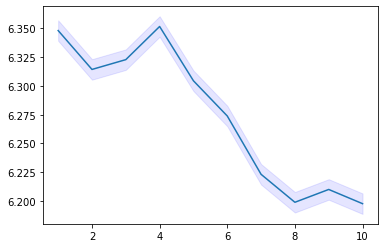

<Figure size 864x576 with 0 Axes>

In [147]:
# build the confidence interval
mean_confidence_interval(result_months, confidence)

## Есть ли какие-то региональные особенности

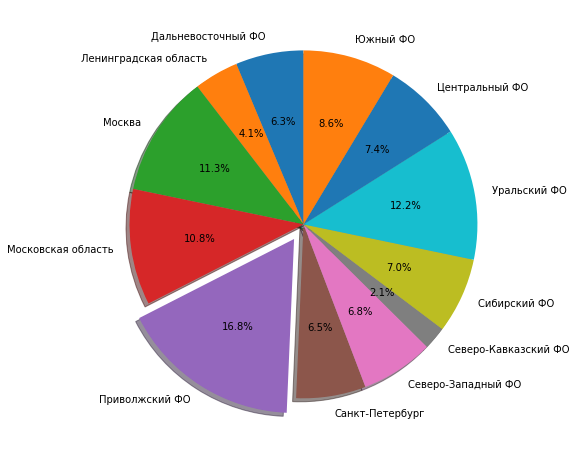

In [96]:
count_by_region = df.groupby('regionname').count()
regions = ['Дальневосточный ФО','Ленинградская область','Москва','Московская область','Приволжский ФО','Санкт-Петербург',
           'Северо-Западный ФО','Северо-Кавказский ФО','Сибирский ФО','Уральский ФО','Центральный ФО','Южный ФО']

fig1, ax1 = plt.subplots(figsize = (12,8))
explode = (0,0,0,0,0.1,0,0,0,0,0,0,0)
ax1.pie(count_by_region['unitid'],explode=explode, labels=regions, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

## Часть 2
- Основные драйверы изменения показателя: что его тянет вверх, а что вниз? Оценить размер вклада разных факторов
- Влияет ли структура собранных данных на показатель (например, стали больше собирать данных по региону/продукту, где исторически оценка ниже)


In [159]:

client = df.groupby(['trn_month','newclient']).response.agg([ 'count']).reset_index()


In [136]:
client['trn_month'] = client['trn_month'].replace([1,2,3,4,5,6,7,8,9,10],['Январь',"Февраль","Март","Апрель","Май","Июнь","Июль","Август","Сентрябь","Октябрь"])


In [137]:
client['newclient'] = client['newclient'].replace([0,1],['клиент','новый клиент'])

In [160]:
client

,trn_month,newclient,count
0,1,0,32594
1,1,1,5486
2,2,0,29509
3,2,1,4629
4,3,0,37668
5,3,1,5853
6,4,0,45425
7,4,1,6382
8,5,0,59969
9,5,1,10048


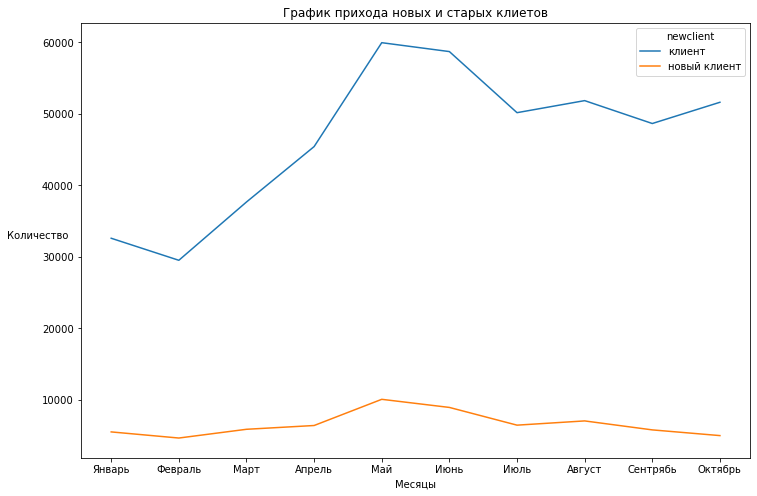

In [145]:
plt.figure(figsize=(12,8))
sns.lineplot(x="trn_month", y="count",
             hue="newclient",
             data=client)
plt.title('График прихода новых и старых клиетов')
plt.xlabel('Месяцы')
plt.ylabel('Количество',rotation = 0)
plt.show()

In [169]:
order = df.groupby(['trn_month','ordertype']).response.agg([ 'count','mean','min','max']).reset_index()
order['trn_month'] = order['trn_month'].replace([1,2,3,4,5,6,7,8,9,10],['Январь',"Февраль","Март","Апрель","Май","Июнь","Июль","Август","Сентрябь","Октябрь"])


In [170]:
order

,trn_month,ordertype,count,mean,min,max
0,Январь,доставка,37406,6.344758,1,7
1,Январь,ресторан,135,6.059259,1,7
2,Январь,самовывоз,539,6.647495,1,7
3,Февраль,доставка,33554,6.309799,1,7
4,Февраль,ресторан,72,6.402778,1,7
5,Февраль,самовывоз,512,6.595703,1,7
6,Март,доставка,42739,6.319146,1,7
7,Март,ресторан,259,6.277992,1,7
8,Март,самовывоз,523,6.642447,1,7
9,Апрель,доставка,45821,6.349578,1,7


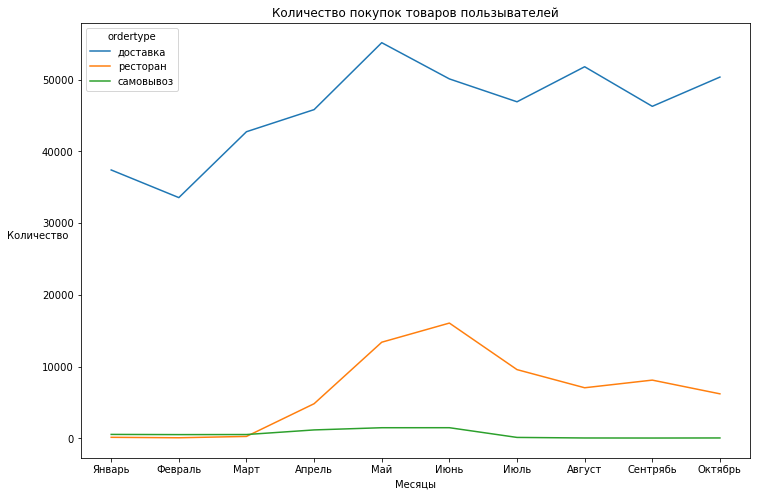

In [173]:
plt.figure(figsize=(12,8))
sns.lineplot(x="trn_month", y="count",
             hue="ordertype",
             data=order)
plt.title('Количество покупок товаров пользывателей')
plt.xlabel('Месяцы')
plt.ylabel('Количество',rotation = 0)
plt.show()

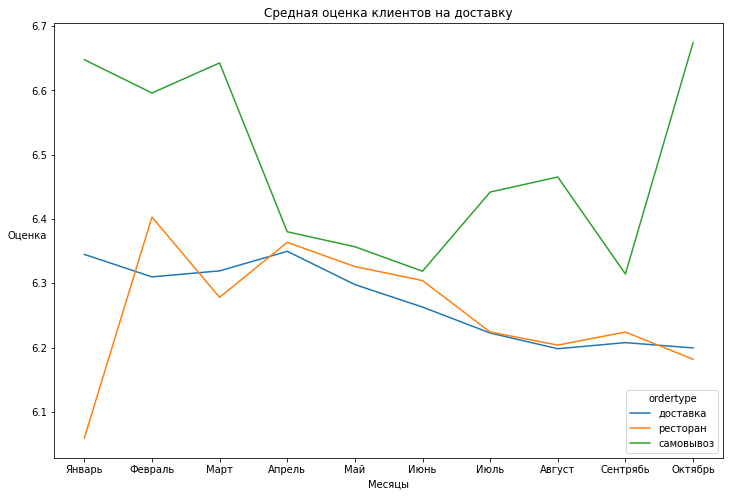

In [174]:
plt.figure(figsize=(12,8))
sns.lineplot(x="trn_month", y="mean",
             hue="ordertype",
             data=order)
plt.title('Средная оценка клиентов на доставку')
plt.xlabel('Месяцы')
plt.ylabel('Оценка',rotation = 0)
plt.show()

In [176]:
category = df.groupby(['trn_month','categoryid']).response.agg([ 'count','mean','min','max']).reset_index()
category['trn_month'] = category['trn_month'].replace([1,2,3,4,5,6,7,8,9,10],['Январь',"Февраль","Март","Апрель","Май","Июнь","Июль","Август","Сентрябь","Октябрь"])


In [177]:
category

,trn_month,categoryid,count,mean,min,max
0,Январь,десерты,1013,6.485686,1,7
1,Январь,закуски,6971,6.213886,1,7
2,Январь,кусочки,6,6.500000,6,7
3,Январь,напитки,3071,6.419082,1,7
4,Январь,пицца,27012,6.369317,1,7
5,Январь,товары,7,6.571429,5,7
6,Февраль,десерты,926,6.505400,1,7
7,Февраль,закуски,5935,6.255265,1,7
8,Февраль,кусочки,1,7.000000,7,7
9,Февраль,напитки,2921,6.371448,1,7


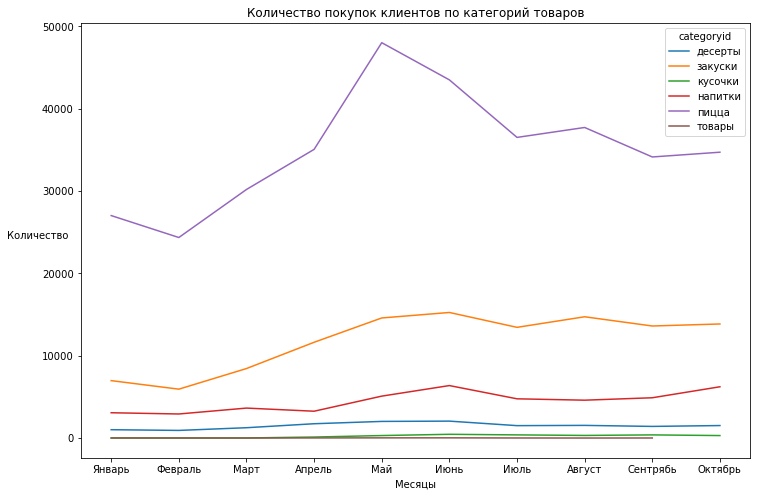

In [180]:
plt.figure(figsize=(12,8))
sns.lineplot(x="trn_month", y="count",
             hue="categoryid",
             data=category)
plt.title('Количество покупок клиентов по категорий товаров')
plt.xlabel('Месяцы')
plt.ylabel('Количество',rotation = 0)
plt.show()

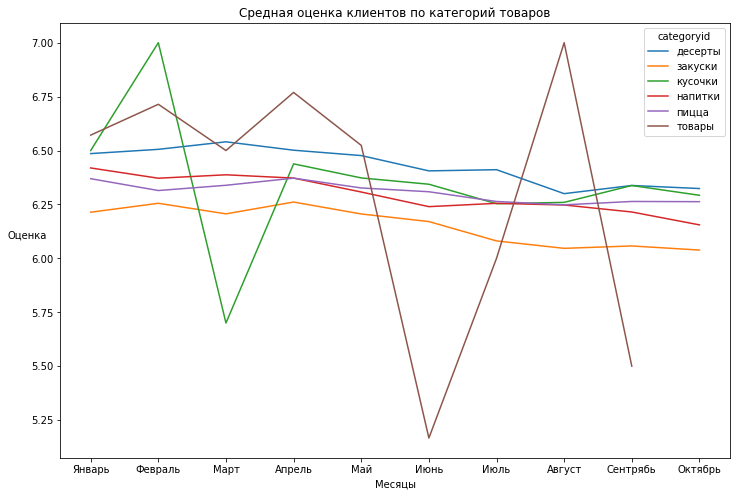

In [182]:
plt.figure(figsize=(12,8))
sns.lineplot(x="trn_month", y="mean",
             hue="categoryid",
             data=category)
plt.title('Средная оценка клиентов по категорий товаров')
plt.xlabel('Месяцы')
plt.ylabel('Оценка',rotation = 0)
plt.show()

## Часть 3
- что порекомендуете делать сети с учетом тех результатов, которые вы получили?

В целом у придприятий хорошие результаты ,среднее удотворенность клиетов состовляет 6,2 бала ,большенстве случаи клиенты довольны.Но я бы 
порекомендовал бы предприятий  обратить внимания  на качество доставки товара.Обратить внимания или поменят товары  из категорий 'товары' ,по причине что у этой категорий низкий оценка и продажа при сравнений остальными.
- если бы вы захотели продолжить анализ, какие данные вы бы запросили? И какие гипотезы с помощью этих данных стали бы проверять?

 Мне бы хотелось увидеть айди каждого клиента ,чтобы дальнейшем анализировать как изменинся оценка клиента со временем , 
 еще создал бы модел который рекемендует продавцу какие товары рекомендовать этому клиенту (основоваясь на историй клиента),
 еще можно создать модел который рекемендует новым клиентам товары по популярности(но думаю это будет актуально если в меню много выбора )
 